<a href="https://colab.research.google.com/github/nirjalalala/learn_ml/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CONCRETE-COMPRESSIVE-STRENGTH DATASET**

Data from - https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set/data

###**Objective**:
---
<br> To perform EDA and fit a regression model that predicts concrete-compression-strength based on various other features.

---

### **1. MODULES IMPORT AND DATA LOAD**

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error


In [2]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/concrete_data.csv')

#Printing first 5 rows ensures that the dataset has been loaded properly.
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## **2. EXPLORATORY DATA ANALYSIS**

###**2.1 Data Profiling**

In [3]:
#Checking datatypes and null values in the columns of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


---

*   There are 9 colums and 1030 total rows.
*   There are no missing values.
*   All columns are numeric.

---

In [4]:
#Statistical measures of all column
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.isnull().sum().sum()

np.int64(0)

---
* No missing values found. Data is clean.

---

In [6]:
df.duplicated().sum()

np.int64(25)

---
25 duplicate rows found. Need to remove those duplicate values.

---

In [7]:
df1 = df.drop_duplicates()

In [8]:
df1.duplicated().sum()

np.int64(0)

---

*   No more duplicate values found. Good Quality data.

---

In [9]:
#Correlation among the variables
corr = df1.corr()

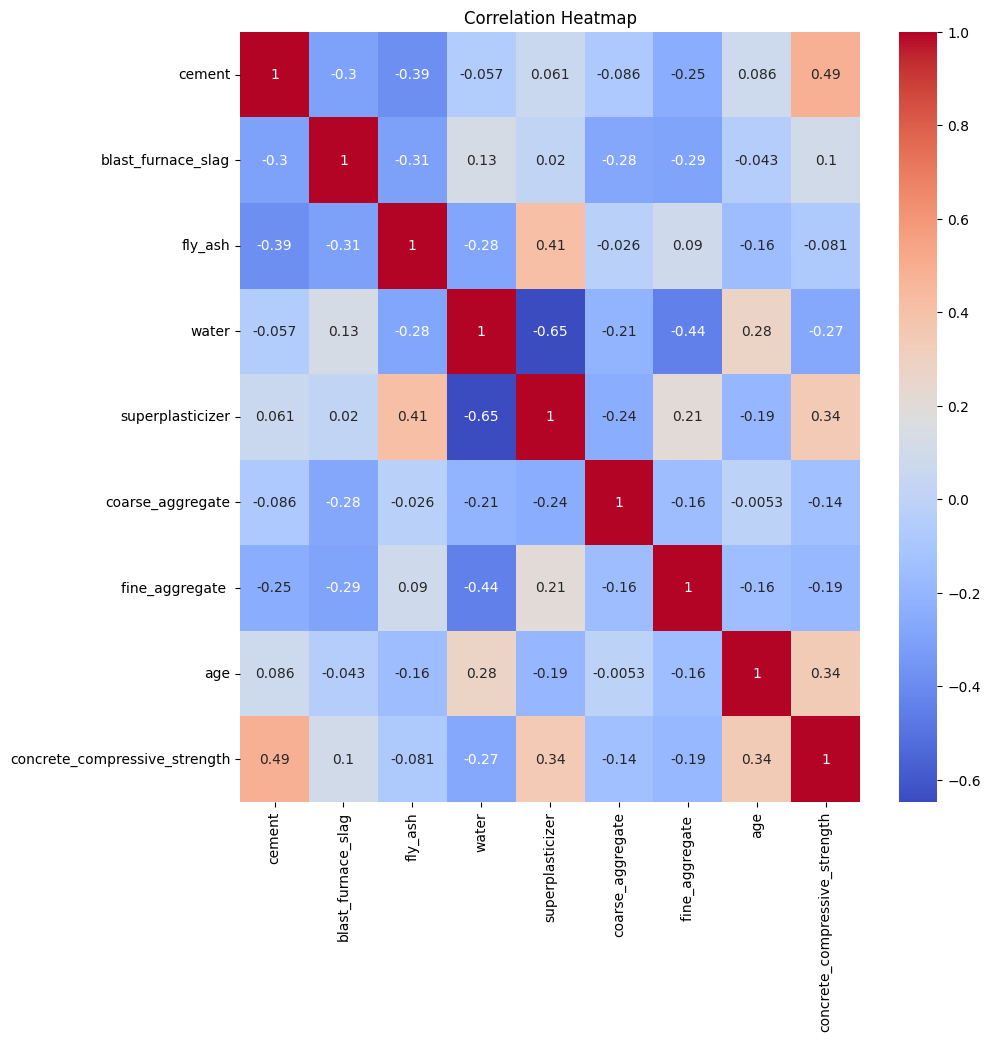

In [10]:
#Visualizing the correlation using a heat map

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

---
Features like water, fine_aggregate and superplasticizer have high correlation with each other.

---

We can also find the correlation of our target variable with the predicting variables.

In [11]:
#Correlation of 'concrete_compressive_strength' with remaining variables

corr['concrete_compressive_strength'].sort_values(ascending=False)

,concrete_compressive_strength
concrete_compressive_strength,1.000000
cement,0.488283
superplasticizer,0.344209
age,0.337367
blast_furnace_slag,0.103374
fly_ash,-0.080648
coarse_aggregate,-0.144717
fine_aggregate,-0.186448
water,-0.269624


---
We can see that, 'concrete_compressive_strength' has:
*  moderate positive correlation with features like 'cement' , 'superplasticizer', 'age' and 'blast_furnace_slag'.
* weak negative correlation with features like 'water', 'fine_aggregate', 'coarse_aggregate' and 'fly_ash'.
* Highest correlation is with 'cement' while the lowest correlation is with 'fly_ash'.

---

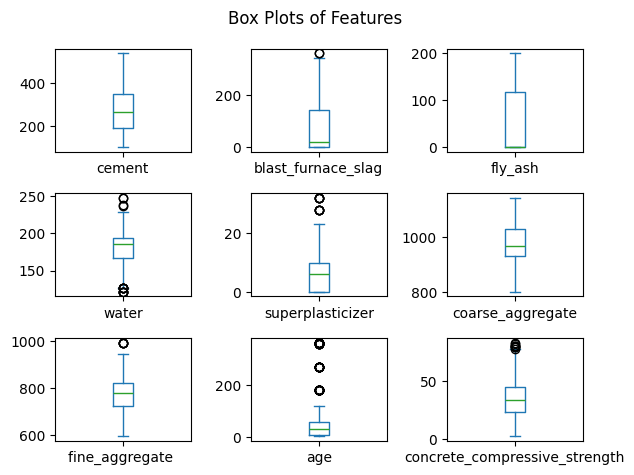

In [12]:
#boxplots for each columns for outlier detection

df1.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.suptitle("Box Plots of Features")
plt.tight_layout()
plt.show()

---

Outliers detected in multiple columns. Needs to be cleaned. Impute with mean values.

---

In [13]:
df_copy = df1.copy()

for column in df_copy.columns:
  #IQR method for handling outliers
  Q1 = df_copy[column].quantile(0.25)
  Q3 = df_copy[column].quantile(0.75)
  IQR = Q3 - Q1
  #defining lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  #replacing outliers with mean values
  df_copy.loc[df_copy[column] < lower_bound, column] = df_copy[column].mean().astype(int)
  df_copy.loc[df_copy[column] > upper_bound, column] = df_copy[column].mean().astype(int)


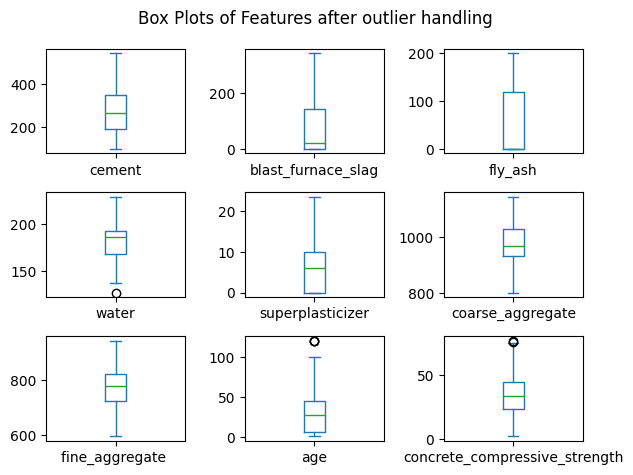

In [14]:
#boxplots for each column after outlier handling

df_copy.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.suptitle("Box Plots of Features after outlier handling")
plt.tight_layout()
plt.show()

---

Very few of the outliers seen in four of the columns are very close to the normal range. So, no more alteration in outliers done.

OUTLIERS HANDLED !

---

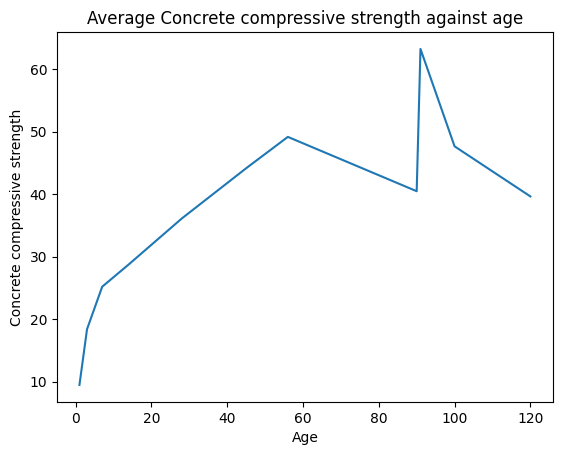

In [15]:
# To use a line plot, group by age and calculate the mean
age_strength_mean = df_copy.groupby('age')['concrete_compressive_strength'].mean().reset_index()

sns.lineplot(x='age', y='concrete_compressive_strength', data=age_strength_mean)
plt.title("Average Concrete compressive strength against age")
plt.xlabel("Age")
plt.ylabel("Concrete compressive strength")
plt.show()

---

This shows how the average concrete compressive strength changes as age
increases. The maximum average strength is seen at age 100 days.

---

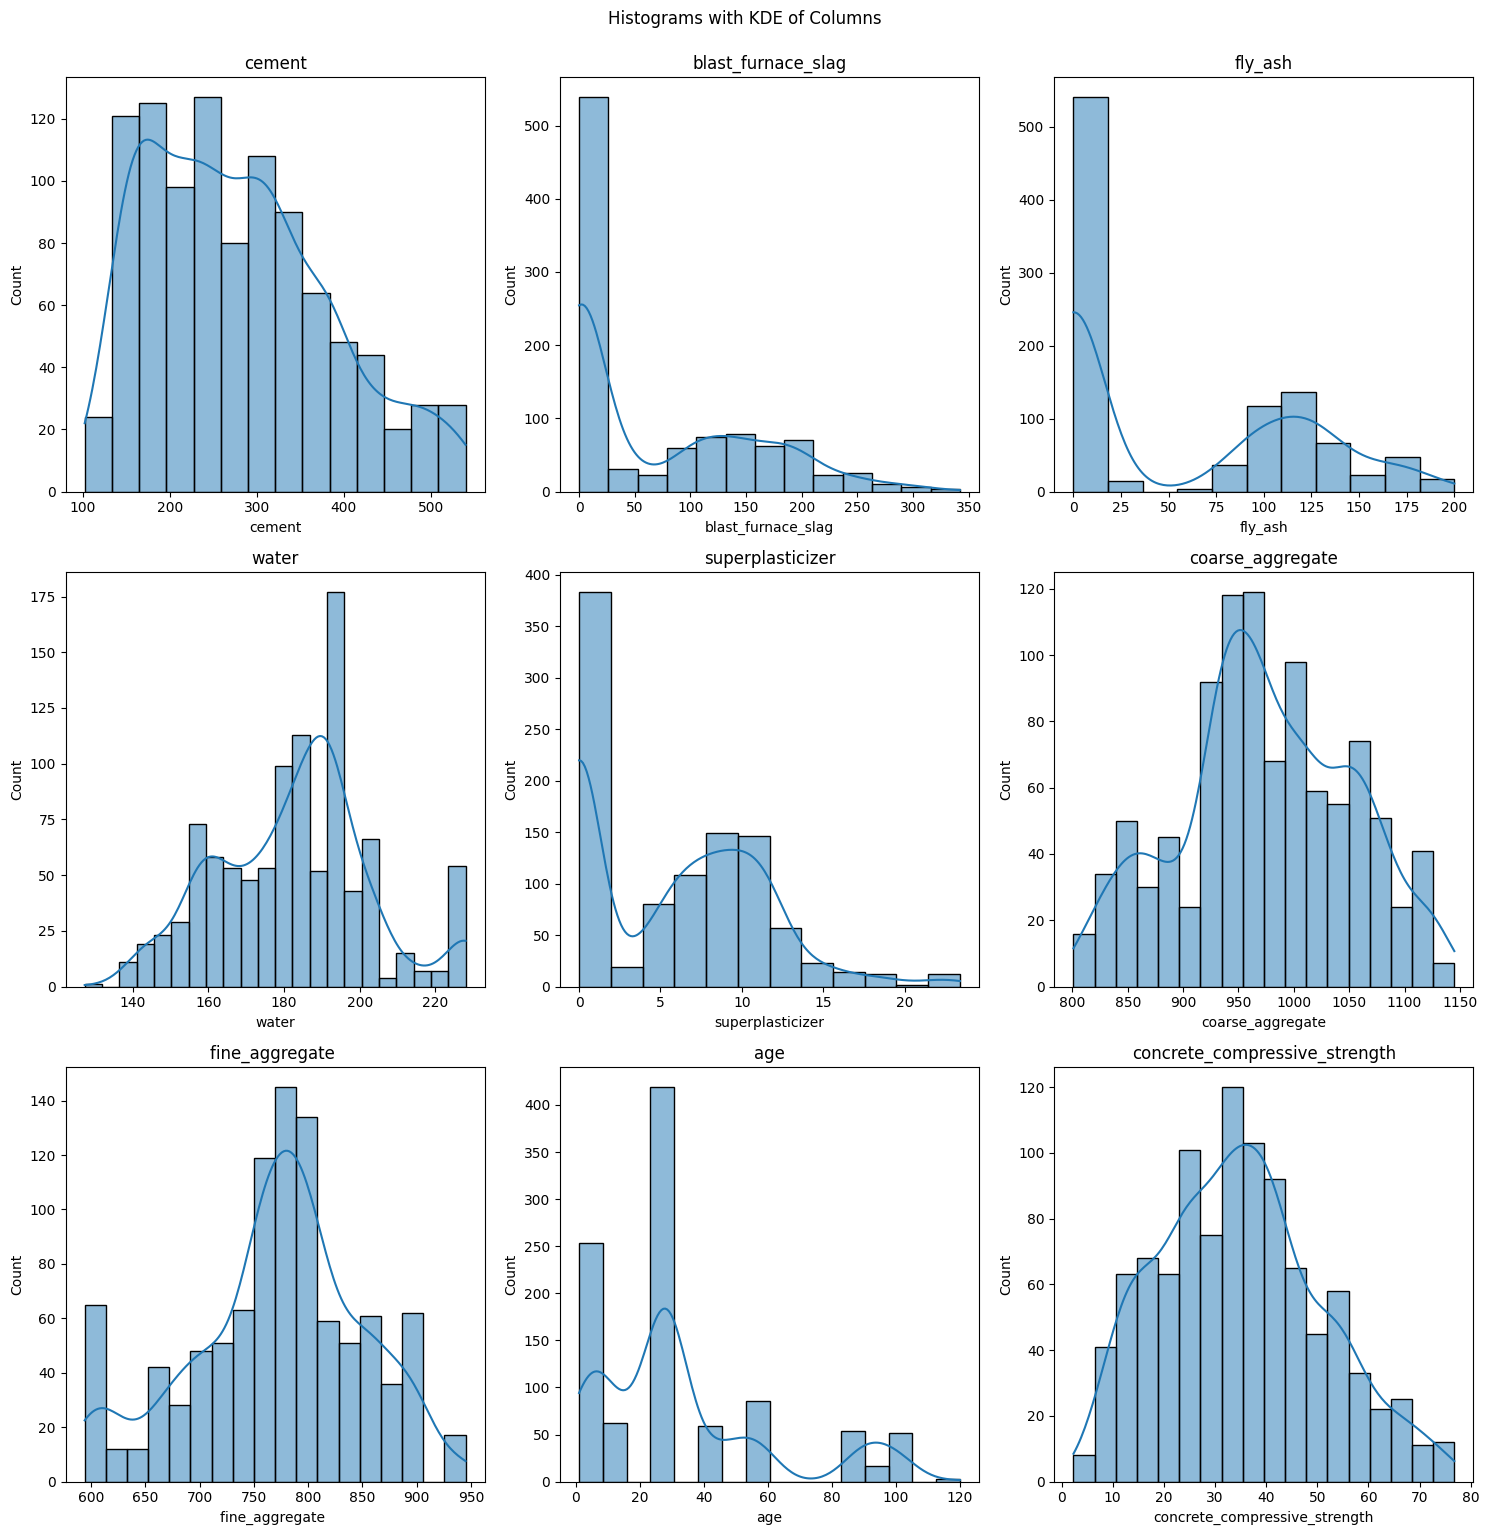

In [16]:
#Creating a distplot for all numerical features

# Create a figure and a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and the axes
for i, column in enumerate(df.columns):
    # Plot the histogram with KDE using seaborn.histplot
    sns.histplot(data=df_copy, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)


plt.tight_layout() # Adjust layout to prevent overlapping titles and labels
plt.suptitle( y=1.02, t="Histograms with KDE of Columns")
plt.show()

---
* None of our features have normal distribution.
* The peak of all distributions can be viewed to identify mode and median values.
* The diagram shows wider spread for features like age, blast_furnance_sage and fly_ash.

---

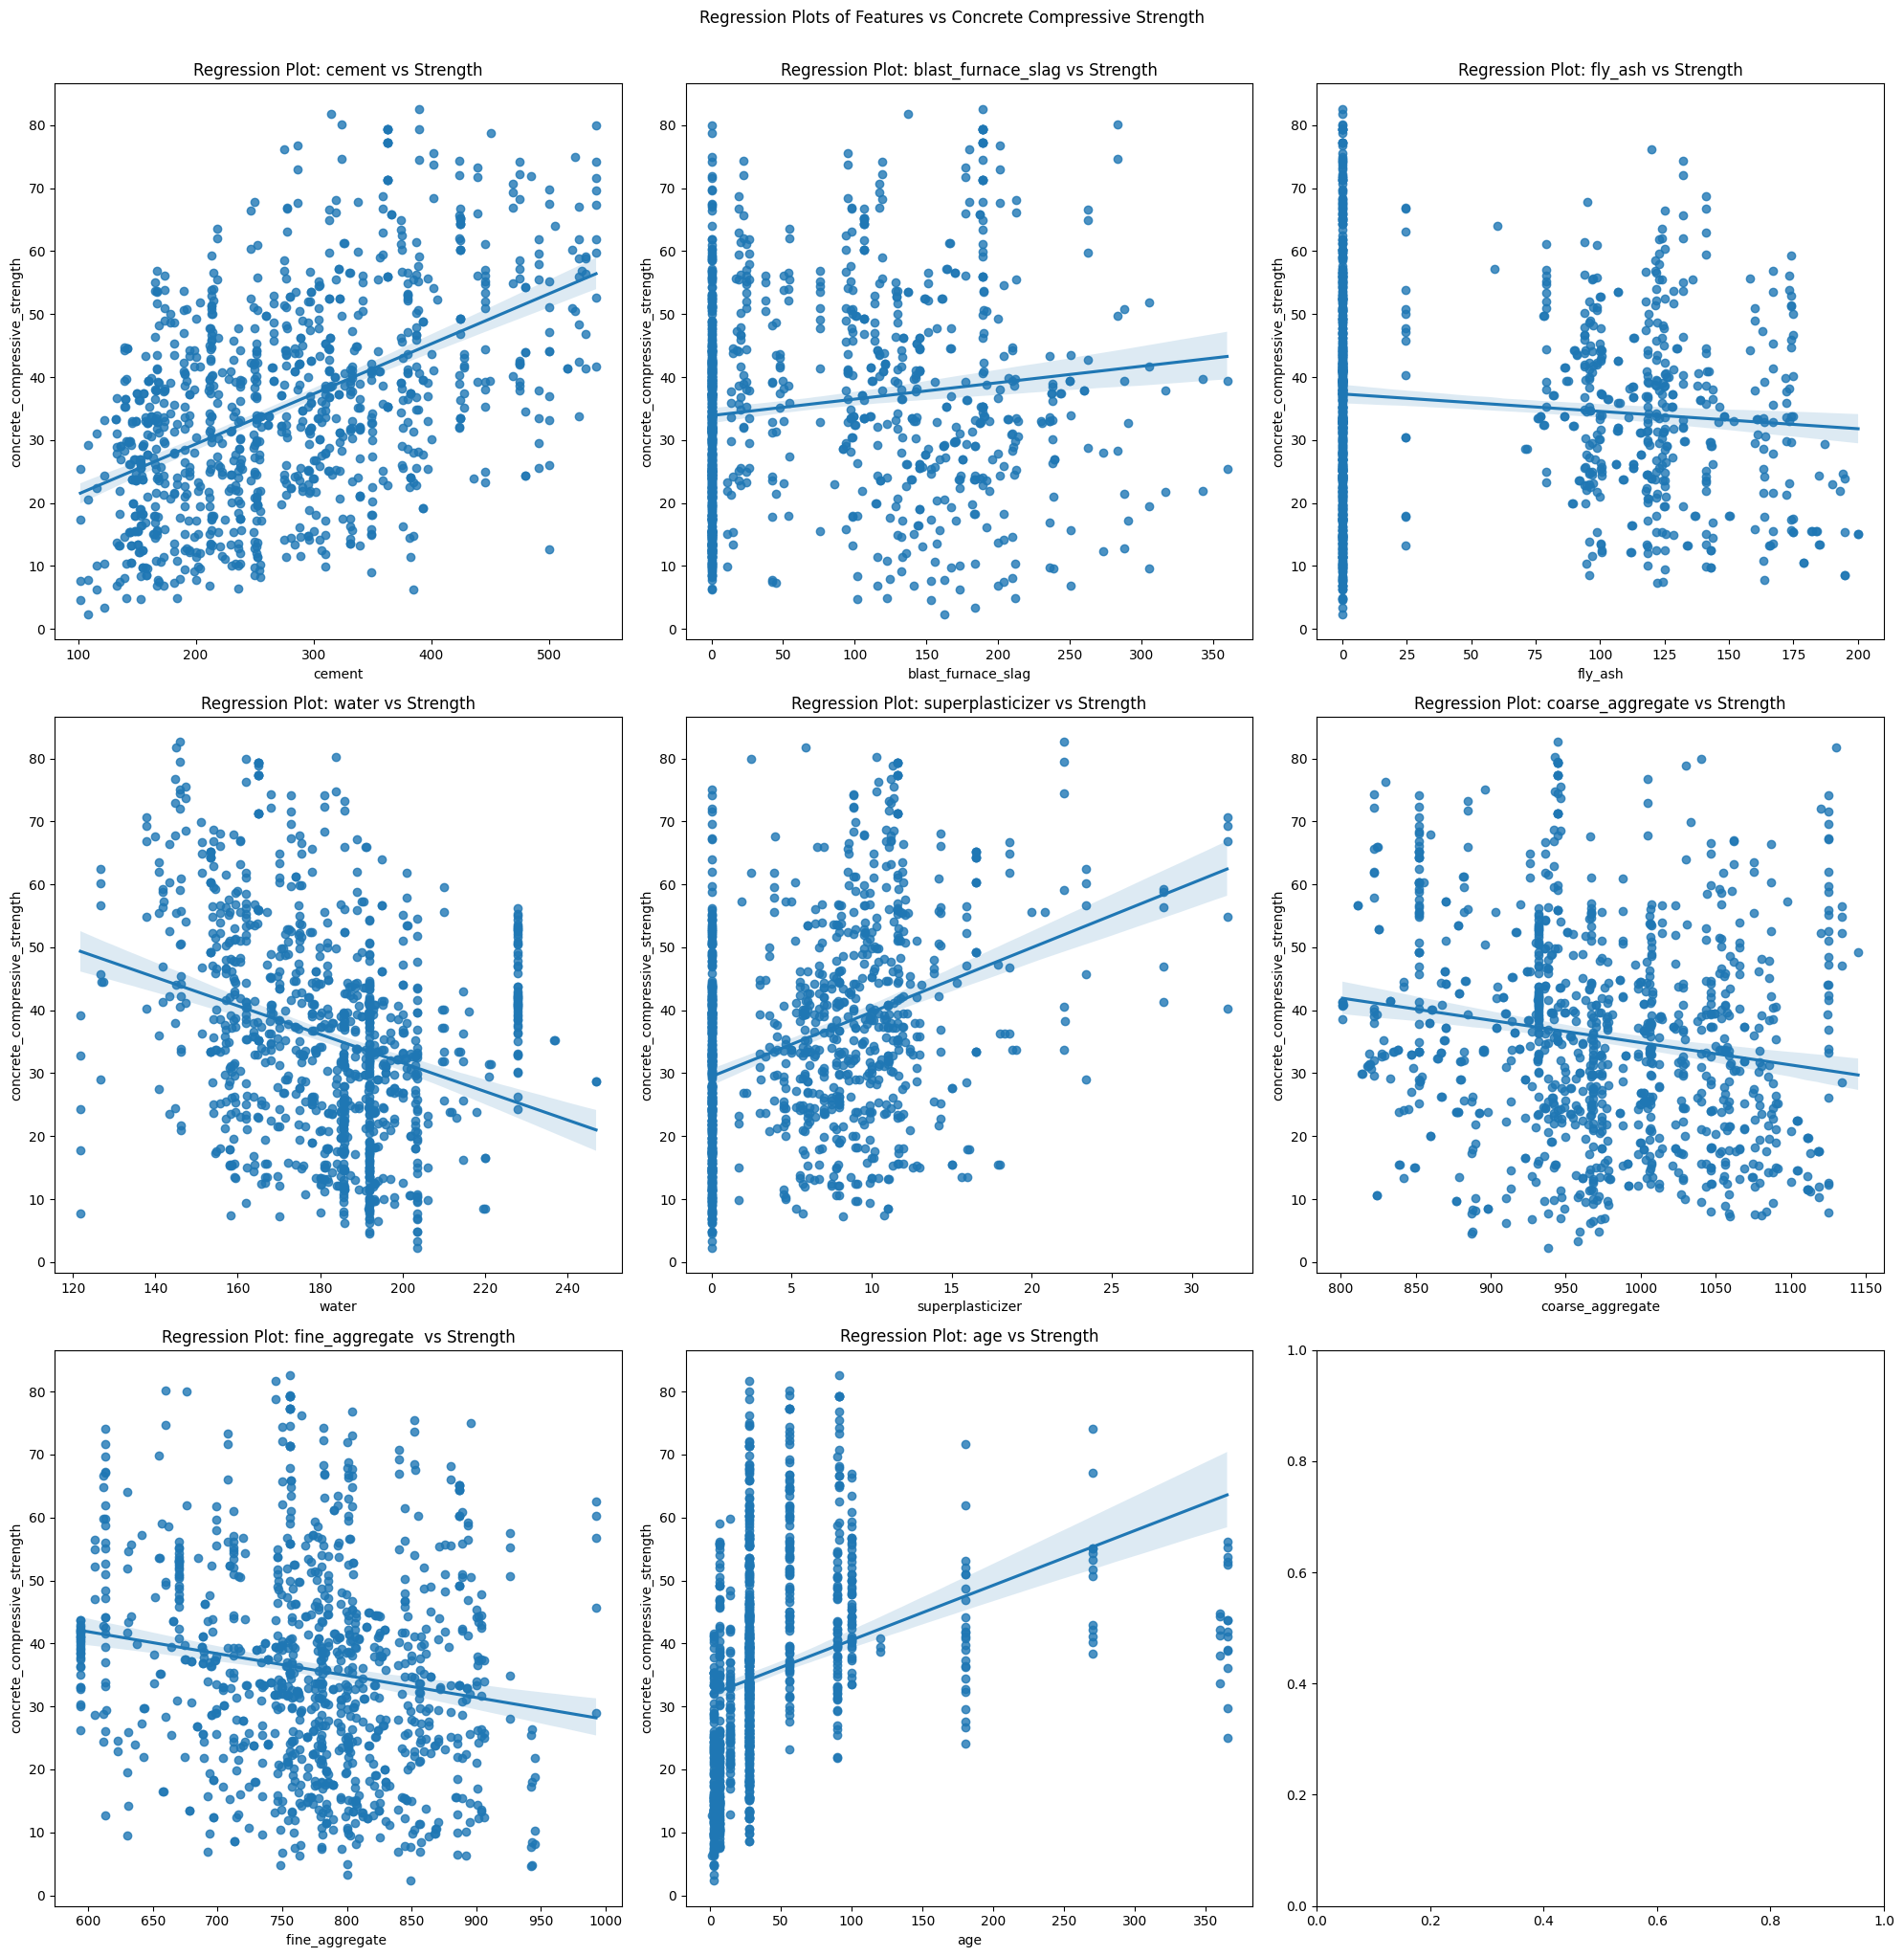

In [17]:
# Creating reg-plots between target variable and each of the other features

# Create a figure and a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the feature columns and the axes
for i, column in enumerate(df.columns[:-1]):
  # Plot the regplot on the current axis
  sns.regplot(x=df[column], y=df['concrete_compressive_strength'], ax=axes[i])
  axes[i].set_xlabel(column)
  axes[i].set_ylabel('concrete_compressive_strength')
  axes[i].set_title(f"Regression Plot: {column} vs Strength")

plt.tight_layout()
plt.suptitle("Regression Plots of Features vs Concrete Compressive Strength", y=1.02)
plt.show()

---
The regression plots for each feature against 'concrete_compressive_strength' visually demonstrate the relationship between each individual feature and the target variable.
* For example, the regplot for 'cement' shows a positive linear trend, indicating that higher cement content generally leads to higher compressive strength.
* The regplot for 'water', on the other hand, shows a negative linear trend, suggesting that more water tends to decrease compressive strength. <br> These visual insights align with the correlation analysis performed before.

---

##**3. DATA PREPROCESSING**

In [18]:
#Load our X features and y label
X = df_copy.drop('concrete_compressive_strength',axis=1).values
y = df_copy['concrete_compressive_strength'].values

#Split our data as training data and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17)


---
Splitting our data before scaling prevents data-leaks.

---

In [19]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

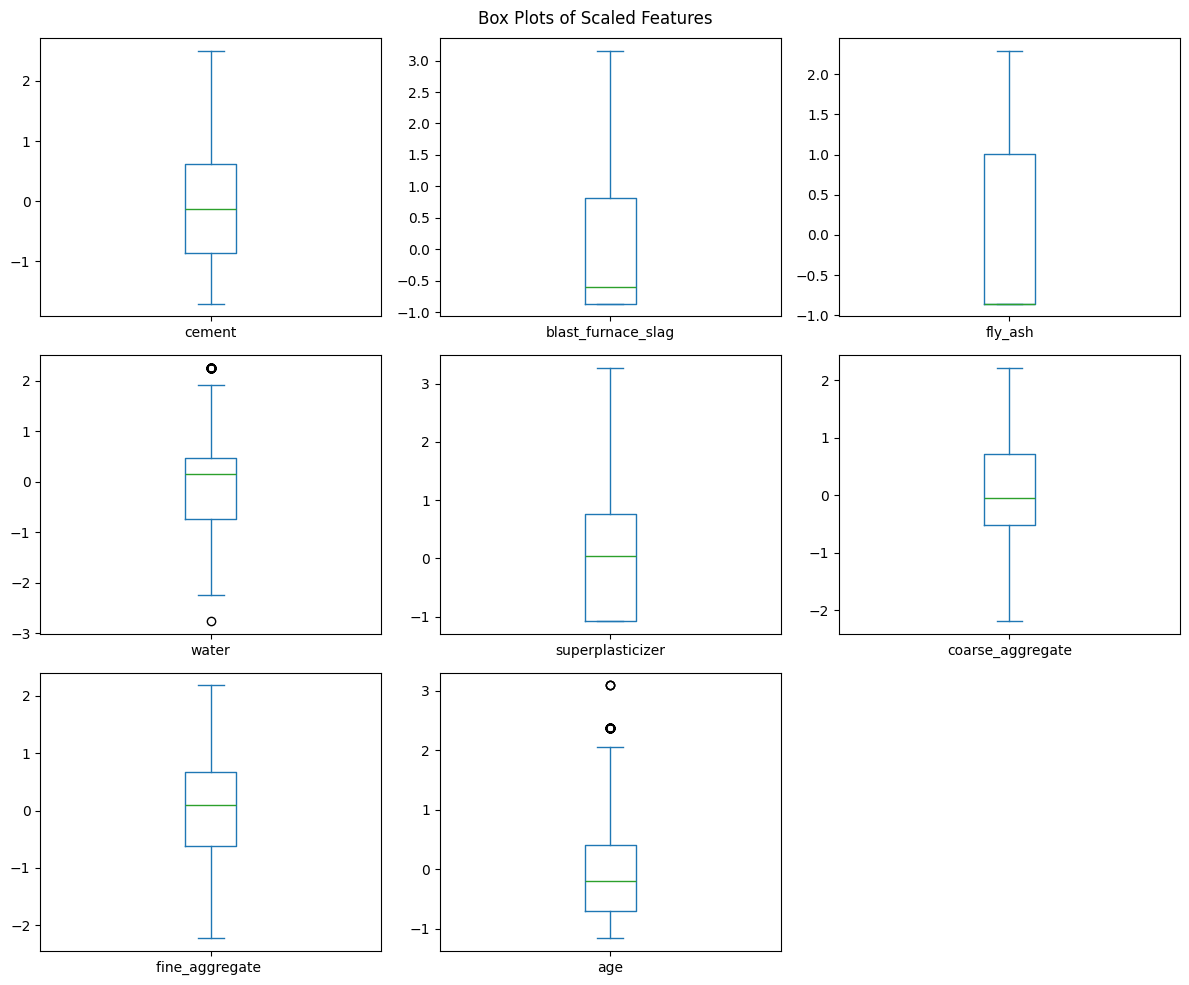

In [20]:
df_scaled = pd.DataFrame(X_train_scaled, columns=df_copy.drop('concrete_compressive_strength', axis=1).columns)

#Box-plot after Scaling
df_scaled.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12, 10))
plt.suptitle("Box Plots of Scaled Features")
plt.tight_layout()
plt.show()

---
As we can see, our data is now centered at 0 (mostly).

---

In [21]:
#Save df_scaled as csv file

df_scaled.to_csv('df_scaled.csv', index=False)

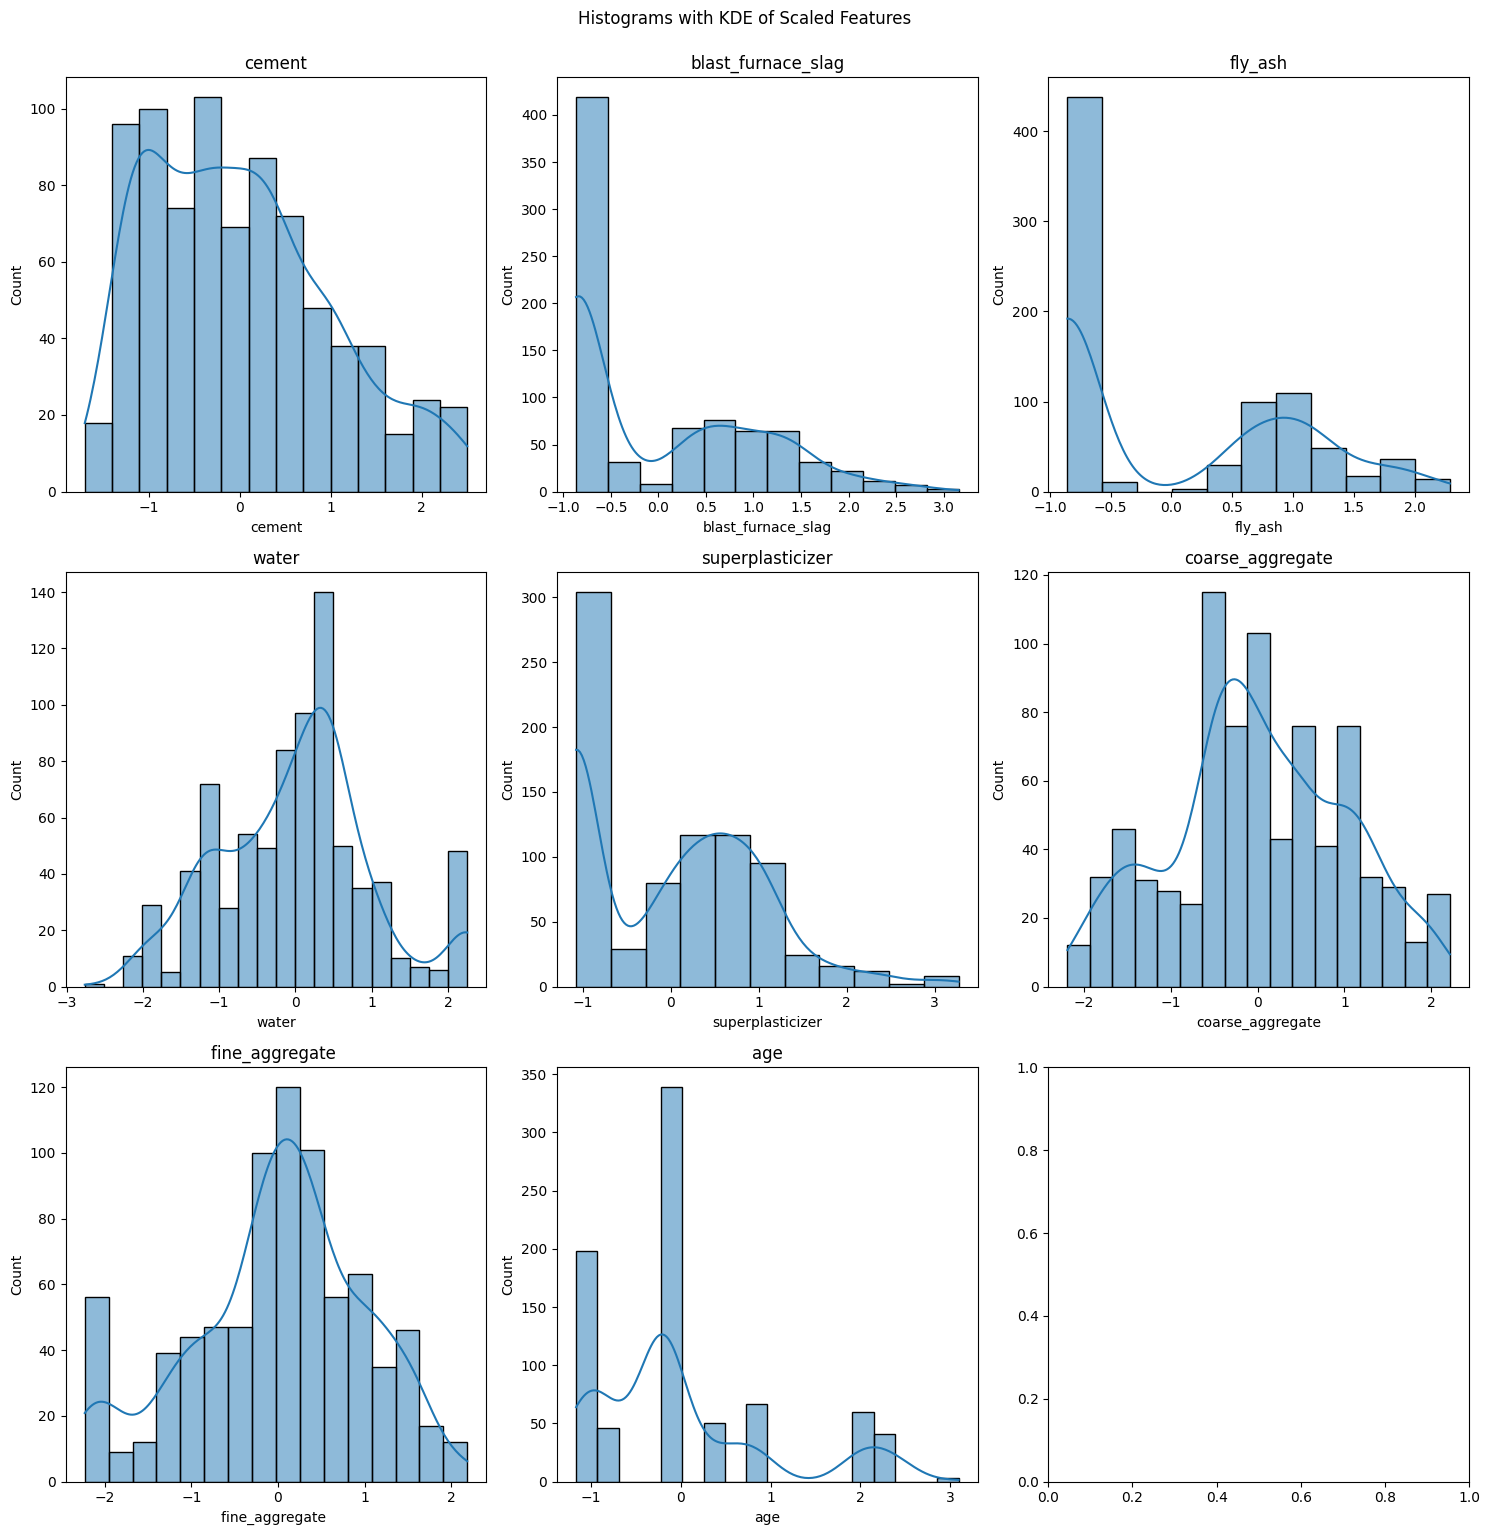

In [22]:
#Creating a distplot for all numerical features

# Create a figure and a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and the axes
for i, column in enumerate(df_scaled.columns):
    # Plot the histogram with KDE using seaborn.histplot
    sns.histplot(data=df_scaled, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)


plt.tight_layout() # Adjust layout to prevent overlapping titles and labels
plt.suptitle("Histograms with KDE of Scaled Features", y=1.02)
plt.show()

---
The distribution shape is preserved. But now our data is concerntrated around 0.

---

## **4. Training, Testing and Inference**

---

We'll try five different regression models:
* Linear Regression
* Ridge Regression
* Decision Tree Regression
* Random Forest Regression
* Support Vector Regression

---



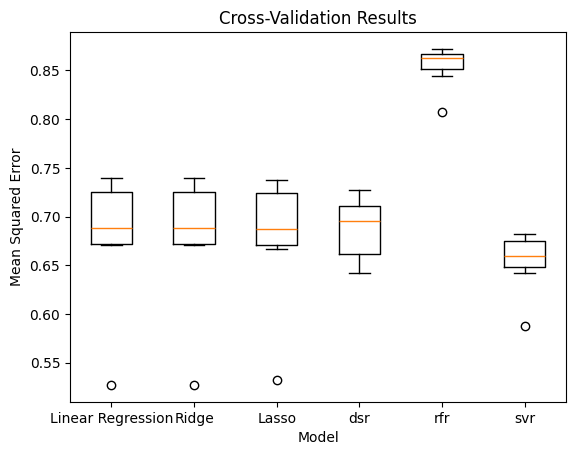

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=0.1),
    "Lasso": Lasso(alpha=0.1),
    "dsr": DecisionTreeRegressor(max_depth=5,min_samples_split=5),
    "rfr": RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5),
    "svr": SVR()
    }

#Creating a list that will hold cross-validation scores of all models
results = []

#Creating a KFold object
#This performs training and validation for a same model for 7 times
#Every time, the validation data changes.
kf = KFold(n_splits=7, random_state=42, shuffle=True)

# Loop through the models' values
for model in models.values():

  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)

  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, tick_labels=models.keys())
plt.title("Cross-Validation Results")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.show()

In [24]:
test_mse = {}
for name, model in models.items():

  # Fit the model to the training data
  model.fit(X_train_scaled,y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)

  # Calculate the test_rmse
  test_mse[name] = mean_squared_error(y_test, y_pred)
  print(f"{name} Test Set MSE: {test_mse[name]}")

Linear Regression Test Set MSE: 71.56565494771519
Ridge Test Set MSE: 71.56786881117878
Lasso Test Set MSE: 72.00010637333648
dsr Test Set MSE: 79.9059193287951
rfr Test Set MSE: 33.94069084552809
svr Test Set MSE: 82.32552815770072


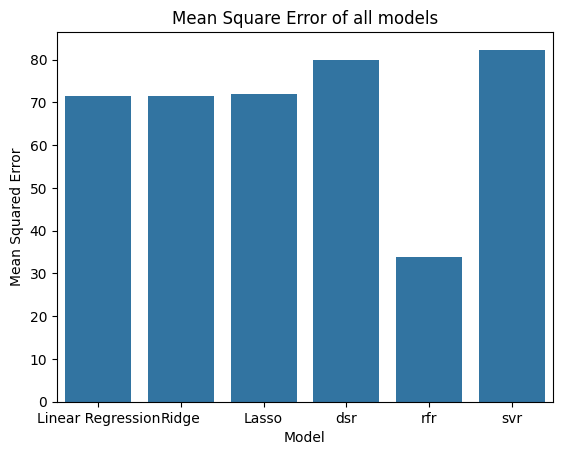

In [25]:
#bar graph to show mse of all models

sns.barplot(x=list(models.keys()), y=test_mse.values())
plt.title("Mean Square Error of all models")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.show()

---

From above two figures, we conclude that the rfr (random forest regresser) model has the least errors and highest cross validation scores.

---



###Baseline Model

In [26]:
#Create the model
regression_model_baseline = RandomForestRegressor(random_state=42)

# Fit to the training data
regression_model_baseline.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

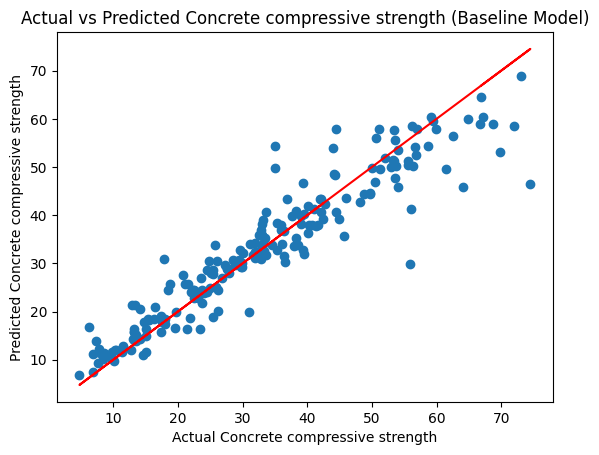

In [27]:
#Make predictions on the test data using the tuned model
y_pred = regression_model_baseline.predict(X_test_scaled)

#Visualize the model prediction using scatter-plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Concrete compressive strength")
plt.ylabel("Predicted Concrete compressive strength")
plt.plot(y_test,y_test, color='red')
plt.title("Actual vs Predicted Concrete compressive strength (Baseline Model)")
plt.show()


In [28]:
#Squared errors
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regressor Test Set MSE: {mse}")
print(f"Random Forest Regressor Test Set RMSE: {rmse}")
print(f"Random Forest Regressor Test Set R-squared: {r2}")

Random Forest Regressor Test Set MSE: 32.25081082785877
Random Forest Regressor Test Set RMSE: 5.678979734763875
Random Forest Regressor Test Set R-squared: 0.8808041710317939


In [29]:
#Absolute errors
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 3.8375929449972355


---

Our model prediction is pretty good as the data points follow a linear pattern.<br>
Prediction is pretty good for lower values, but model seems to under-predict for larger values of strength.

---

## **5. Tuning HyperParameters**

###Tuned Model

The model we will be tuning is RandomForestRegression model.

In [30]:
from sklearn.model_selection import RandomizedSearchCV


In [31]:

param_grid = {
                  "n_estimators":[50,100,150,200, 250, 300],
                  "max_depth":[None, 10, 20, 30, 40],
                  "min_samples_split":[2,4,6, 8, 10],
                  "min_samples_leaf":[1, 2, 3],
                  "bootstrap":[True, False]
            }

rfr_cv = RandomizedSearchCV(regression_model_baseline, param_distributions=param_grid, cv=kf, n_iter=50, random_state=42)

In [32]:
# Fit the RandomizedSearchCV object to the scaled training data
rfr_cv.fit(X_train_scaled, y_train)


RandomizedSearchCV(cv=KFold(n_splits=7, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(random_state=42), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=42)

In [33]:
#Get the tuned model
regression_model_tuned = rfr_cv.best_estimator_

In [34]:
regression_model_tuned

RandomForestRegressor(max_depth=40, min_samples_split=4, n_estimators=250,
                      random_state=42)

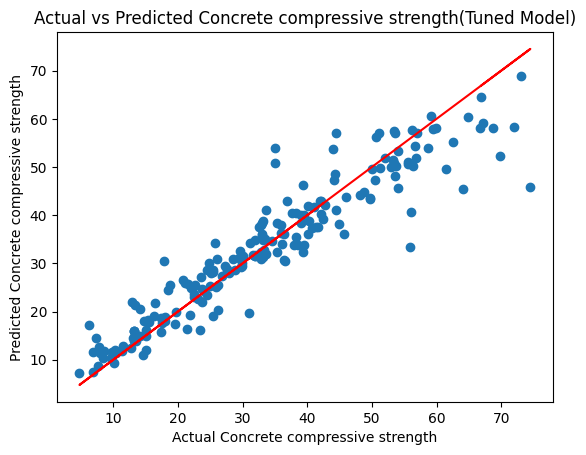

In [35]:
#Make predictions on the test data using the tuned model
y_pred_tuned = regression_model_tuned.predict(X_test_scaled)

#Visualize the model prediction using scatter-plot
plt.scatter(y_test, y_pred_tuned)
plt.xlabel("Actual Concrete compressive strength")
plt.ylabel("Predicted Concrete compressive strength")
plt.plot(y_test,y_test, color='red')
plt.title("Actual vs Predicted Concrete compressive strength(Tuned Model)")
plt.show()

In [36]:
#squared errors
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned) # Calculate RMSE
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Random Forest Regressor Test Set MSE: {mse_tuned}")
print(f"Tuned Random Forest Regressor Test Set RMSE: {rmse_tuned}")
print(f"Tuned Random Forest Regressor Test Set R-squared: {r2_tuned}")

Tuned Random Forest Regressor Test Set MSE: 32.319498533024145
Tuned Random Forest Regressor Test Set RMSE: 5.6850240573830595
Tuned Random Forest Regressor Test Set R-squared: 0.8805503080203858


In [37]:
#Absolute errors
from sklearn.metrics import mean_absolute_error
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print(f"Mean Absolute Error: {mae_tuned}")

Mean Absolute Error: 3.8712191587086204


---
Our model under-predicts Compressive strength for strength>50.<br>
However, r2_score of 0.88 is pretty satisfactory given our large dataset.

---

---

###**SAVING THE MODEL**

---



In [38]:
import joblib

In [39]:
joblib.dump(regression_model_tuned, 'tuned_regression_rfr.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [40]:
joblib.dump(regression_model_baseline, 'baseline_regression_rfr.pkl')

['baseline_regression_rfr.pkl']

---
#**Concrete Compressive Strength Prediction - Model Training Summary**
---
**Objective:** To train a regression model to predict concrete compressive strength based on various features.

---

**Data:** The model was trained on the Concrete Compressive Strength dataset.

---

**Methodology:**

---
* **Data Preparation**: The dataset was loaded and explored. Key steps included checking data types, identifying missing values (none found), and examining descriptive statistics and correlations. The data was split into training and testing sets (80/20 split).
* **Feature Scaling**: Features were scaled using StandardScaler to ensure that no single feature dominated the model due to differences in scale.
* **Model Selection**: Several regression models were initially evaluated using cross-validation on the training set: Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regression, Random Forest Regression, and Support Vector Regression.
* **Model Performance Evaluation (Initial)**: The Mean Squared Error (MSE) and cross-validation scores were used to compare the initial performance of the models. Random Forest Regression showed promising performance based on these initial assessments.
* **Hyperparameter Tuning**: The Random Forest Regressor model, identified as a strong candidate, was selected for hyperparameter tuning using GridSearchCV with 7-fold cross-validation. The parameters tuned included n_estimators, max_depth, and min_samples_split.
* **Tuned Model Evaluation**: The tuned Random Forest Regressor model was evaluated on the independent test set to assess its generalization performance.

---
**Results:**

---
* The GridSearchCV identified the optimal hyperparameters for the Random Forest Regressor within the defined search space.
* The tuned Random Forest Regressor model achieved the following performance metrics on the test set:
1. Mean Squared Error (MSE):  32.183748277243744
2. Root Mean Squared Error (RMSE):  5.6730722080054425
3. R-squared (R²):  0.8810520276316154  
which is not much, but slightly better than our baseline model (0.8795412869738555)

---
**Conclusion:**

---

The model training and tuning process for predicting concrete compressive strength is complete. A Random Forest Regressor model has been trained and tuned, and its performance on the independent test set has been evaluated. The obtained metrics provide an indication of the model's ability to predict concrete strength on unseen data.

---
**Next Steps:**

---

* Further analysis of model predictions and potential areas for improvement (e.g., feature engineering, exploring other models).
* Deployment of the trained model for making predictions on new concrete data.

---